In [1]:
import sys
sys.path.insert(0, r"..\\")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import staircase as sc
from sortedcollections import SortedDict

from hotstepper.Basis import Basis
from hotstepper.Step import Step
from hotstepper.Steps import Steps
from hotstepper.Steps import Analysis

C:\Anaconda3\lib\site-packages\cupy\_environment.py:265: ResourceWarning: unclosed file <_io.TextIOWrapper name='C:\\Anaconda3\\lib\\site-packages\\cupy\\.data\\_wheel.json' mode='r' encoding='cp1252'>
  _preload_config = json.load(open(config_path))


let $\theta(t) = Heaviside(t)$



$
\theta(t) = \left\{
        \begin{array}{ll}
            0 & \quad t < 0 \\
            1 & \quad t \geq 0
        \end{array}
    \right.
$
where $t \in \mathbb{R}$

In [2]:
df = pd.read_csv(r"../data/vessel_queue.csv", parse_dates=['enter', 'leave'], dayfirst=True)

df.enter = df.enter.apply(pd.Timestamp)
df.leave = df.leave.apply(pd.Timestamp)

vsteps = Steps.stepify(df,'enter','leave')


C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7.0
7.0


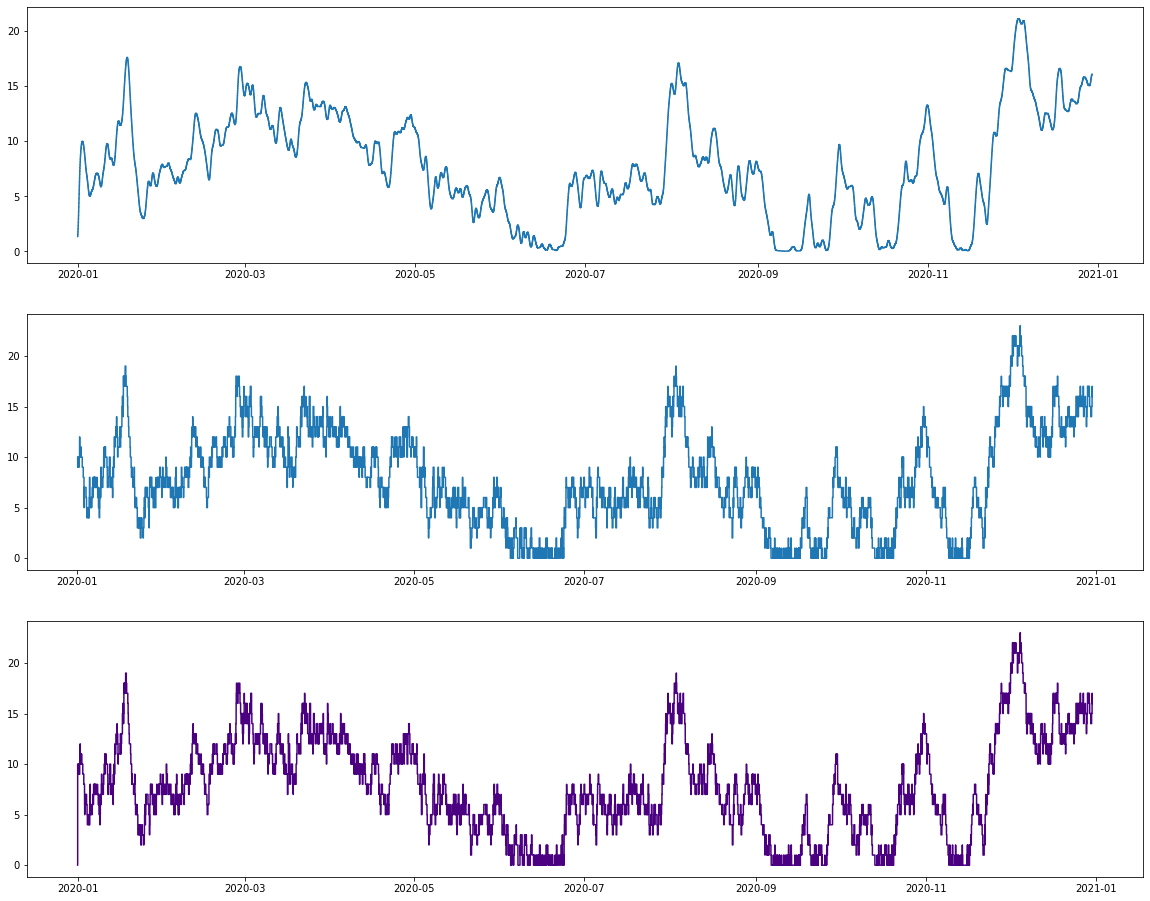

In [3]:
p = np.arange(pd.Timestamp(2020,1,1), pd.Timestamp(2020,12,30), pd.Timedelta(hours=1)).astype(pd.Timestamp)
fig,ax = plt.subplots(nrows=3,figsize=(20,16))

#vsteps.rebase(tbase)
ax[0].step(p,vsteps.smooth_step(p,5),where='post')

queue = sc.Stairs(use_dates=True).layer(df.enter, df.leave)
queue.plot(ax[1])

vsteps.plot(ax=ax[2])
print(vsteps.median())
print(queue.median())


<AxesSubplot:>

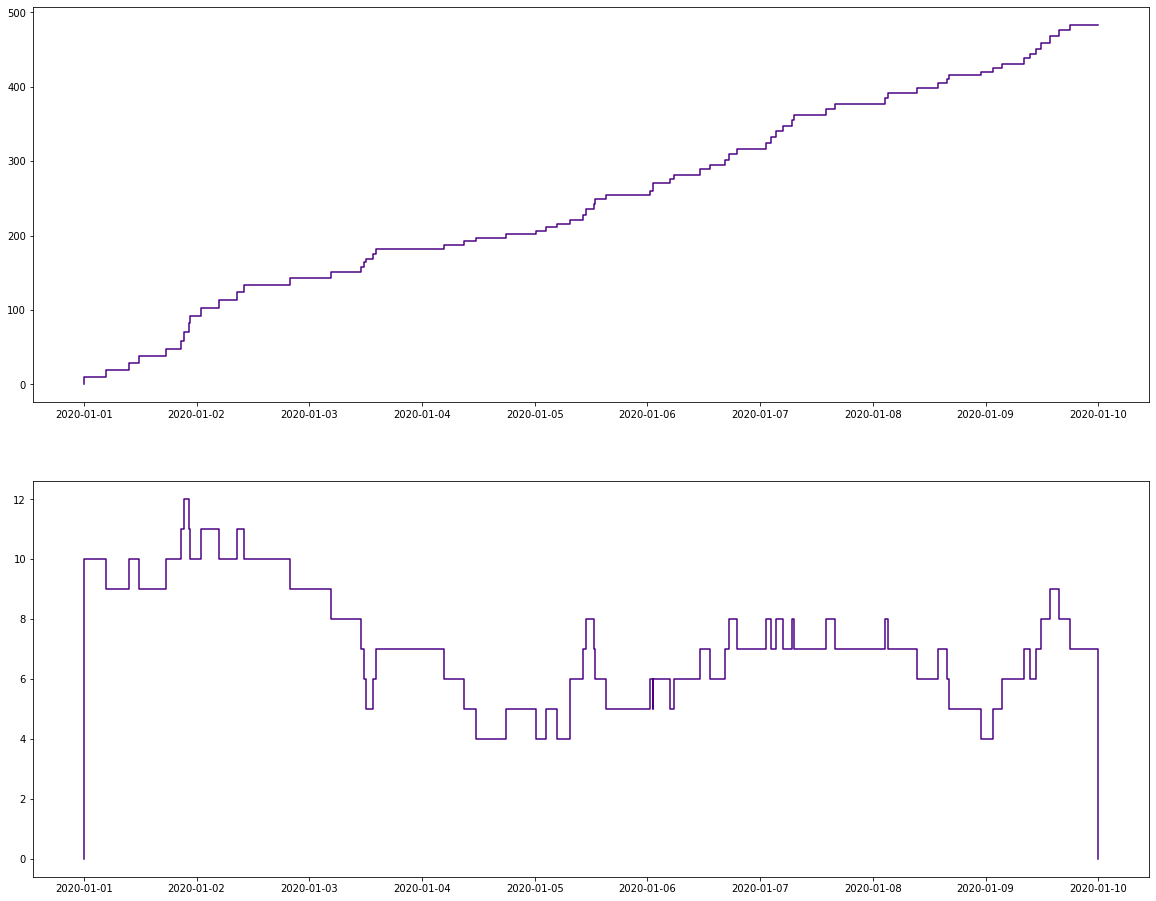

In [5]:
fig,ax = plt.subplots(nrows=2,figsize=(20,16))

vstep_clipped = vsteps.clip(pd.Timestamp(2020,1,1),pd.Timestamp(2020,1,10))
vstep_dict = vstep_clipped.to_dict()
#vstep_dict.
vstep_dict.keys()
[Step(start=k,weight=v) for k,v in vstep_dict.items()]

new_vstep = Steps.stepify(vstep_dict)
new_vstep.plot(ax=ax[0])
vstep_clipped.plot(ax=ax[1])

In [ ]:
Steps.aggregate()